In [322]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [323]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from NaiveBayesPDF import get_stats

# Load dataset

In [324]:
df_train = pd.read_csv('data/train_splitted.csv')
df_valid = pd.read_csv('data/valid_splitted.csv')

X_train = df_train.drop(columns=['ID_code', 'target'])
X_valid = df_valid.drop(columns=['ID_code', 'target'])

y_train = df_train['target']
y_valid = df_valid['target']

# Naive Bayes

## Normalize indep vars

In [325]:
means, stds, min_z_zcore, max_z_zcore, z_scores = get_stats(X_train.values, resolution=501)

## Get likelihoods

In [326]:
c=3
i=0
x=2
X = X_train.values

In [327]:
xs =(X[:,i]>x-stds[i]/c)&(X[:, i]<x+stds[i]/c)

In [328]:
xs.sum()

215

In [329]:
# def likelihoods_frequency_vect(v, train1, train0, stds, c=3):
#     # This version calculates all variables v_i in one shot
#     N_interval_0 = ((train0>v-stds/c) 
#                     & (train0<v+stds/c)).sum(axis=0)
#     N_interval_1 = ((train1>v-stds/c) 
#                     & (train1<v+stds/c)).sum(axis=0)
#     return N_interval_0/(2*stds/c), N_interval_1/(2*stds/c)

In [330]:
x=0

In [331]:
df_train.shape

(160000, 202)

In [332]:
(X_train.values>x-stds/c)&(X_train.values<x+stds/c)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True]])

In [333]:
X_train.shape

(160000, 200)

In [334]:
X_train['var_'+str(i)].shape #>x-stds/c

(160000,)

In [336]:
def get_Posterior(x=0, i=0):
    #P(1 | X=x)
    c = 3 #smoothing factor
    # a is the number of observation of ones given thar variable i is between x-stds[i]/c and x+stds[i]/c
    indexes = (X_train>x-stds/c)&(X_train<x+stds/c)
    a = indexes[df_train['target']==1].sum()
    b = indexes[df_train['target']==0].sum()
    
#   if a+b<500: return 0.1 #smoothing factor
#     # RETURN PROBABILITY
    return a
    # return a / b

In [337]:
get_Posterior()

var_0         1
var_1      3702
var_2         0
var_3         2
var_4         0
var_5      3630
var_6         0
var_7         0
var_8      3373
var_9         0
var_10     3843
var_11     3635
var_12        0
var_13     1245
var_14        0
var_15        0
var_16        0
var_17     3177
var_18      600
var_19     1705
var_20      229
var_21     1103
var_22     1426
var_23        0
var_24        6
var_25        0
var_26     3371
var_27     3262
var_28        0
var_29      632
           ... 
var_170    3620
var_171    3966
var_172     516
var_173    3939
var_174     196
var_175       0
var_176    3813
var_177       0
var_178    3747
var_179    2705
var_180    3696
var_181       0
var_182    3687
var_183     694
var_184    1813
var_185    3043
var_186      24
var_187    3238
var_188       0
var_189    3105
var_190    2888
var_191      85
var_192    2460
var_193    2983
var_194       0
var_195    3763
var_196    3284
var_197       0
var_198       0
var_199    3614
Length: 200, dtype: int6

In [281]:
def get_Posterior(x, i=0):
    #P(1 | X=x)
    c = 3 #smoothing factor
    # a is the number of observation of ones given thar variable i is between x-stds[i]/c and x+stds[i]/c
    xs = df_train[(df_train['var_'+str(i)]>x-stds[i]/c)&(df_train['var_'+str(i)]<x+stds[i]/c)]['var_'+str(i)]
    a = len(xs[df_train['target']==1])
    b = len(xs[df_train['target']==0])
    if a+b<500: return 0.1 #smoothing factor
    # RETURN PROBABILITY
    return a / (a+b)
    # ALTERNATIVELY RETURN ODDS
    # return a / b

In [293]:
x=0
i=0
c=3
xs = df_train[(df_train['var_'+str(i)]>x-stds[i]/c)&(df_train['var_'+str(i)]<x+stds[i]/c)]
# a = len(xs[df_train['target']==1])
# b = len(xs[df_train['target']==0])
xs[df_train['target']==0]

/home/usuario/anaconda3/envs/gpu/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
165885,train_165885,0,0.4084,-2.3580,6.4101,6.3512,11.6226,2.3006,4.3739,19.5745,...,1.6410,8.2690,2.2166,4.5286,16.0699,-0.4181,-3.5543,7.3749,13.1001,-16.6303
10693,train_10693,0,0.5979,-0.7717,8.4321,7.1216,11.0864,-11.1819,7.2443,15.5612,...,-3.2289,10.3603,2.2347,1.6486,17.3712,-3.6116,0.4931,10.1748,15.7862,-6.9688
65328,train_65328,0,1.0147,0.0926,11.5542,6.1213,14.1236,3.7310,7.0027,13.8855,...,8.1236,9.5542,2.0134,10.2565,23.5217,0.6036,6.6042,9.0276,21.0147,-2.2733
64498,train_64498,0,0.9302,-4.0585,10.4719,4.2685,10.5250,-3.7847,6.4496,19.1617,...,-3.7415,4.6446,2.4373,4.0081,19.2551,-1.2743,4.5405,8.9674,16.4645,-6.3841
61234,train_61234,0,0.8935,-1.1103,12.9898,4.0356,10.5848,-15.5852,4.1182,23.7974,...,2.8518,6.2990,0.5955,-0.0631,17.2324,1.5028,10.4704,8.2172,20.5543,4.8313


In [290]:
xs

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
165885,train_165885,0,0.4084,-2.3580,6.4101,6.3512,11.6226,2.3006,4.3739,19.5745,...,1.6410,8.2690,2.2166,4.5286,16.0699,-0.4181,-3.5543,7.3749,13.1001,-16.6303
10693,train_10693,0,0.5979,-0.7717,8.4321,7.1216,11.0864,-11.1819,7.2443,15.5612,...,-3.2289,10.3603,2.2347,1.6486,17.3712,-3.6116,0.4931,10.1748,15.7862,-6.9688
65328,train_65328,0,1.0147,0.0926,11.5542,6.1213,14.1236,3.7310,7.0027,13.8855,...,8.1236,9.5542,2.0134,10.2565,23.5217,0.6036,6.6042,9.0276,21.0147,-2.2733
64498,train_64498,0,0.9302,-4.0585,10.4719,4.2685,10.5250,-3.7847,6.4496,19.1617,...,-3.7415,4.6446,2.4373,4.0081,19.2551,-1.2743,4.5405,8.9674,16.4645,-6.3841
61234,train_61234,0,0.8935,-1.1103,12.9898,4.0356,10.5848,-15.5852,4.1182,23.7974,...,2.8518,6.2990,0.5955,-0.0631,17.2324,1.5028,10.4704,8.2172,20.5543,4.8313
131672,train_131672,1,0.4528,-8.9672,8.5680,9.9903,9.6665,-5.9784,6.8417,15.1417,...,8.4732,7.3606,-0.3074,3.7587,14.5545,1.3796,4.9518,9.4264,14.4396,11.4881


In [284]:
xn = (X_train['var_'+str(i)]>x-stds[i]/c)&(X_train['var_'+str(i)]<x+stds[i]/c)

# Create probabilities Matrix

In [285]:
def get_pdf(i = 0, means=means, stds=stds, z_scores=z_scores):
    ps = []
    l_0 = []
    l_1 = []
    for z in z_scores:
        x = z*stds[i] + means[i]
        ps.append(get_Posterior(x, i))
    return ps

### Example with var_1

In [286]:
%time ps = get_pdf(i = 0)

CPU times: user 4.46 s, sys: 0 ns, total: 4.46 s
Wall time: 4.46 s


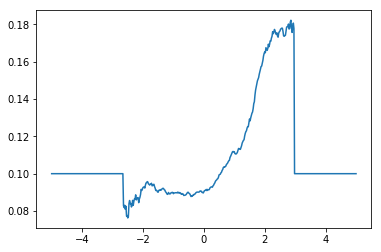

In [287]:
# Posterior
plt.plot(z_scores, ps)
plt.show()